In [ ]:
#Ressources du Blob :


[[0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


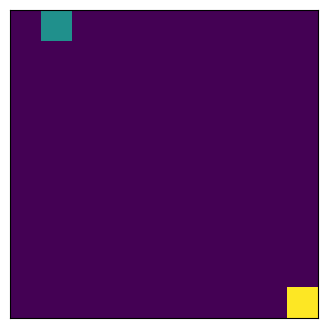

In [23]:
# "Légende" : 1 pour les murs, 2 pour la nourriture, 4 pour le blob, 0 pour les cases vides

import numpy as np

from matplotlib import pyplot as plt
def matrice(l, c):
    """ crée la matrice de taille l x c, remplie de 0
    """
    return np.zeros((l, c))

def placement_nourriture(mat,l, c):
    """ place la nourriture dans la matrice à l'emplacement d'indice [l, c]
    """
    mat[l, c] = 2

def placement_blob(mat,l, c):
    """ place le blob dans la matrice à l'emplacement d'indice [l, c]
    """
    mat[l, c] = 4

def plot_world(world):
    if type(world) == list:
        A = np.array([world])
    else:
        A = world
    plt.figure(figsize=(5,4)) # (30,30) = Taille de la figure
    plt.imshow(A,cmap='viridis')
    plt.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=False)
    plt.show()

mat1 = matrice(10, 10)
placement_blob(mat1, 9, 9)
placement_nourriture(mat1, 0,1)
print(mat1)


plot_world(mat1)  
